<a href="https://colab.research.google.com/github/Harshini-R-SpireNSavvy/P1/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [11]:
pd.get_dummies(x['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [12]:
pd.get_dummies(x['Geography'], drop_first=True)

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [13]:
geography=pd.get_dummies(x['Geography'], drop_first=True)
gender=pd.get_dummies(x['Gender'], drop_first=True)

In [14]:
x=x.drop(['Geography','Gender'],axis=1)

In [15]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [16]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
x=pd.concat([x,geography,gender],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
x_train.shape

(8000, 11)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [24]:
classifer = Sequential()

In [25]:
classifer.add(Dense(units=11,activation='relu'))

In [58]:
classifer.add(Dense(units=7,activation='relu'))
classifer.add(Dropout(0.2))

In [60]:
classifer.add(Dense(units=6,activation='relu'))
classifer.add(Dropout(0.3))

In [61]:
classifer.add(Dense(units=1,activation='sigmoid'))

In [66]:
classifer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [67]:
import tensorflow
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [68]:
model_history=classifer.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7980 - loss: 0.5715 - val_accuracy: 0.8535 - val_loss: 0.3919
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8465 - loss: 0.3970 - val_accuracy: 0.8425 - val_loss: 0.3819
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8375 - loss: 0.3963 - val_accuracy: 0.8508 - val_loss: 0.3774
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8444 - loss: 0.3810 - val_accuracy: 0.8531 - val_loss: 0.3750
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8609 - loss: 0.3639 - val_accuracy: 0.8482 - val_loss: 0.3725
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8601 - loss: 0.3597 - val_accuracy: 0.8538 - val_loss: 0.3718
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8593 - loss: 0.3562 - val_accuracy: 0.8546 - val_loss: 0.3699
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8569 - loss: 0.3590 - 

In [69]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

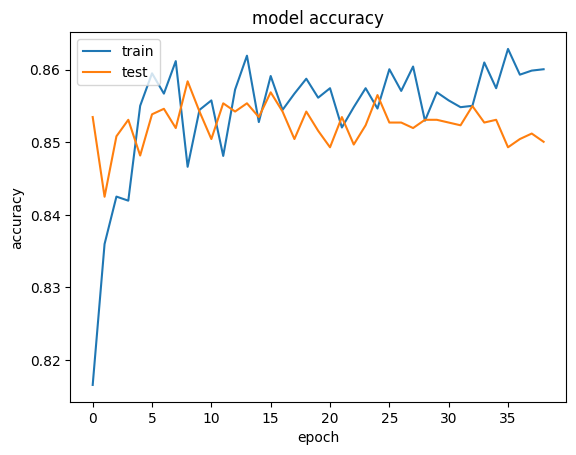

In [70]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

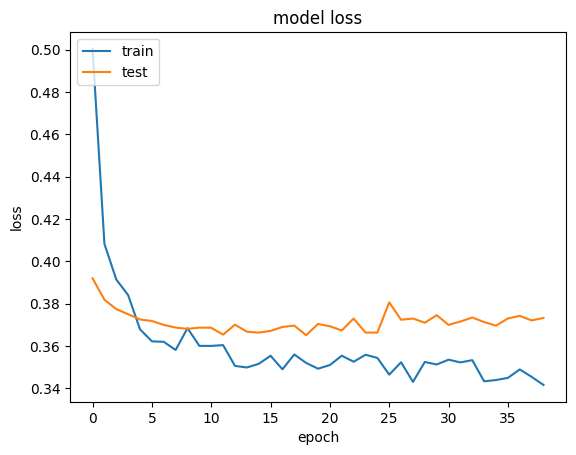

In [71]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [72]:
y_pred=classifer.predict(x_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1527,   68],
       [ 219,  186]])

In [74]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8565

In [75]:
classifer.get_weights()

[array([[ 0.42247203, -0.5417439 ,  0.422947  , -0.24305964, -0.47503546,
         -0.16770503,  0.00661425,  0.16076757, -0.5331829 , -0.23740874,
         -0.07238907],
        [-0.7993082 , -0.6355495 , -0.6888538 ,  0.56477195,  0.50563794,
          0.2642843 ,  0.78508246, -0.1257374 , -0.3603526 ,  0.20537551,
         -0.17927364],
        [ 0.00183891,  0.15984128,  0.8178282 ,  0.04863191, -0.18392901,
          0.36655545, -0.03828859, -0.16783117,  0.24076146, -0.00322179,
          0.02876516],
        [ 0.24383345,  0.95491076, -0.3329472 , -1.0508358 , -0.09462402,
         -0.54798037,  0.15125857, -0.30966103, -0.70700425,  0.56115574,
         -1.4395261 ],
        [-0.5117757 ,  0.53301513,  0.8084062 , -1.0302861 ,  1.0306368 ,
          0.00723854, -1.0417267 , -0.01942529, -0.03329422,  1.0139163 ,
          0.06590067],
        [-0.05240862, -0.28207648,  0.09418386, -0.0492921 ,  0.139532  ,
          0.0455171 , -0.10380776, -0.13271129, -0.11475738, -0.3899086